In [1]:
import numpy as np


np.random.seed(0)

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [3]:
def true_fun(X: np.ndarray) -> np.ndarray:
    return np.cos(1.5 * np.pi * X)

In [4]:
degrees = [1, 2, 3, 4, 15, 20, 30]

X = np.arange(start=-0.75, stop=0.75, step=0.02)
y_true = true_fun(X)
y = y_true + np.random.normal(loc=0.0, scale=2.0, size=len(X)) * 0.1

X = np.reshape(X, newshape=(-1, 1))

In [5]:
print(f"x shape: {X.shape}")
print(f"y shape: {y.shape}")

x shape: (75, 1)
y shape: (75,)


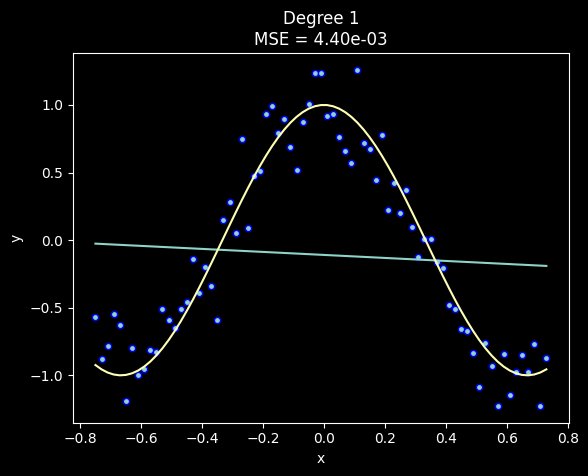

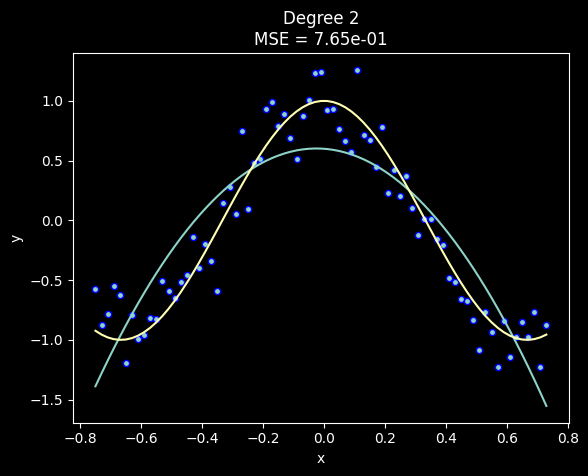

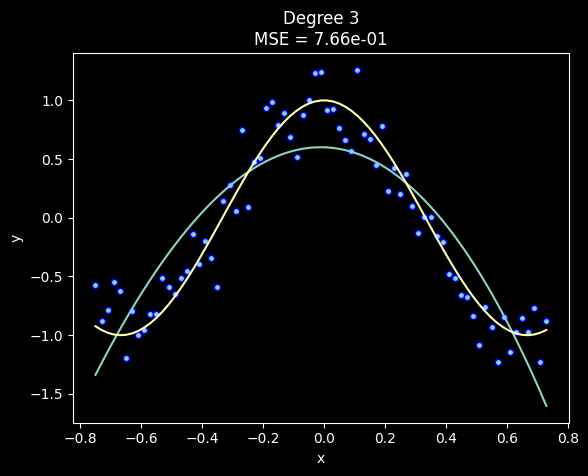

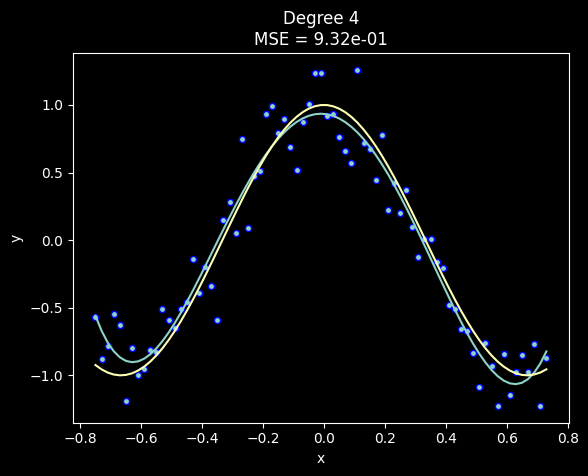

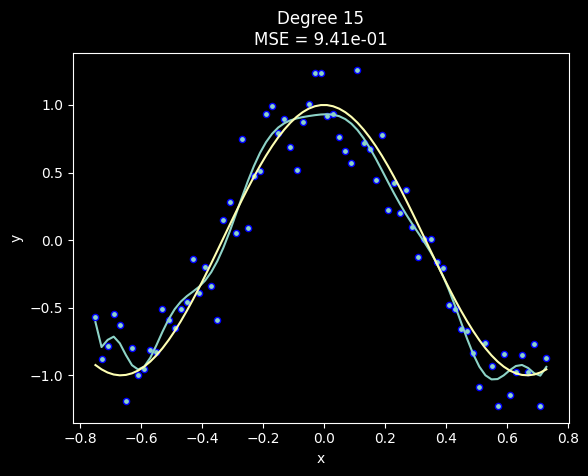

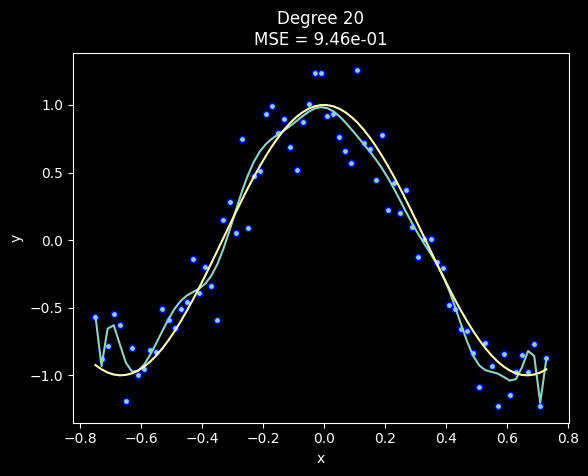

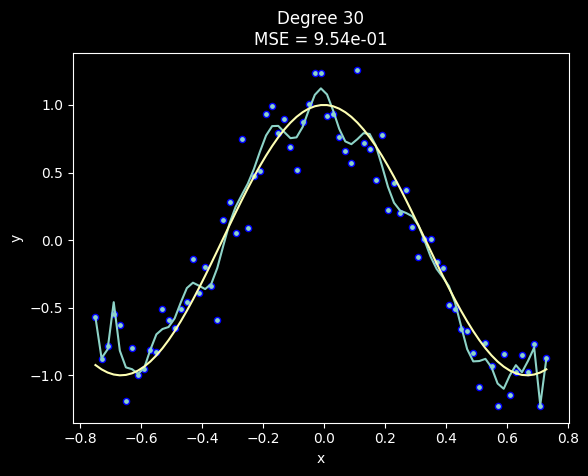

In [6]:
for i in range(len(degrees)):
    fig, ax = plt.subplots()

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    pipeline.fit(X, y)
    score = pipeline.score(X, y)
    y_pred = pipeline.predict(X)

    plt.plot(X, y_pred, label="Model")
    plt.plot(X, y_true, label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Degree {degrees[i]}\nMSE = {score:.2e}")
    plt.show()